# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv("CC GENERAL.csv")
print("==== 5 Baris Teratas Dataset ====")
print(df.head())


==== 5 Baris Teratas Dataset ====
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1 

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


==== Informasi Dataset ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 n

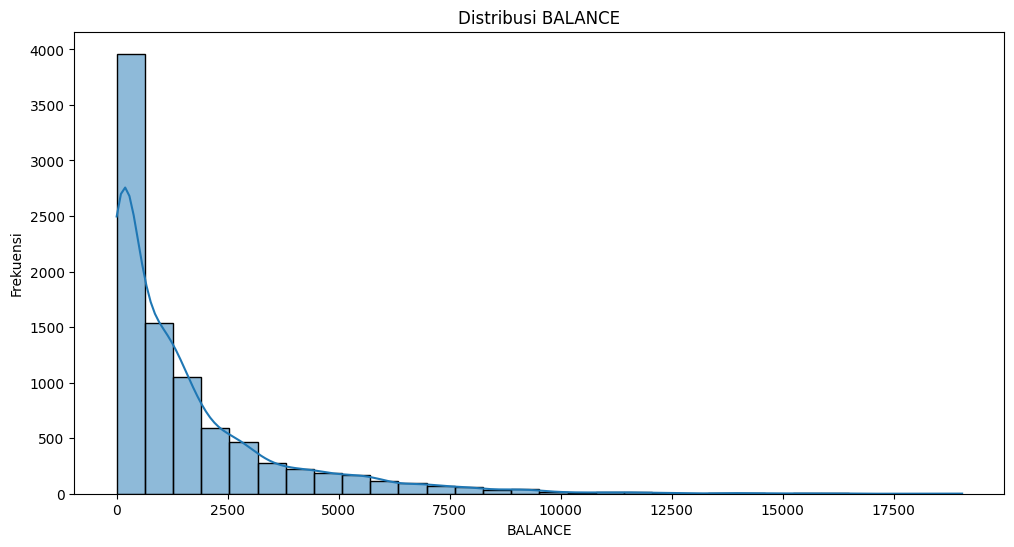

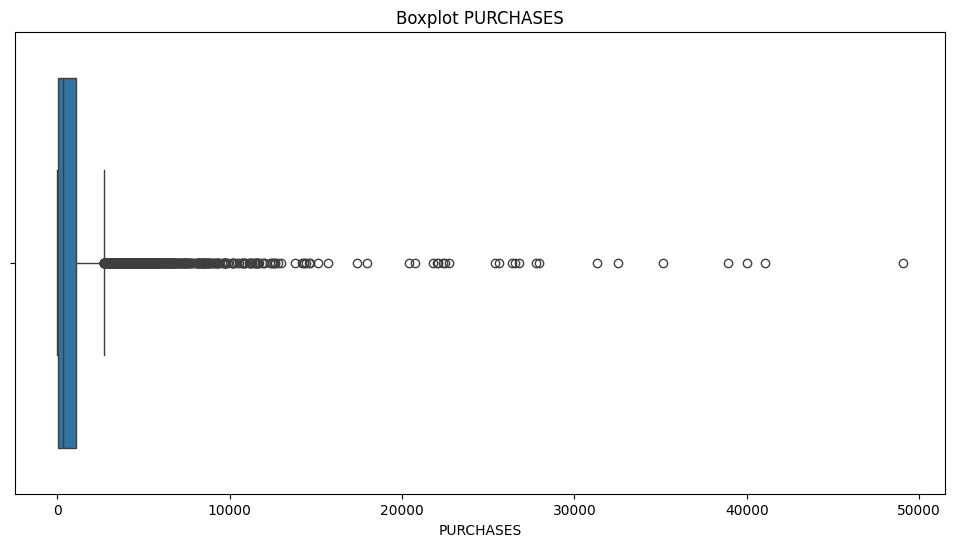

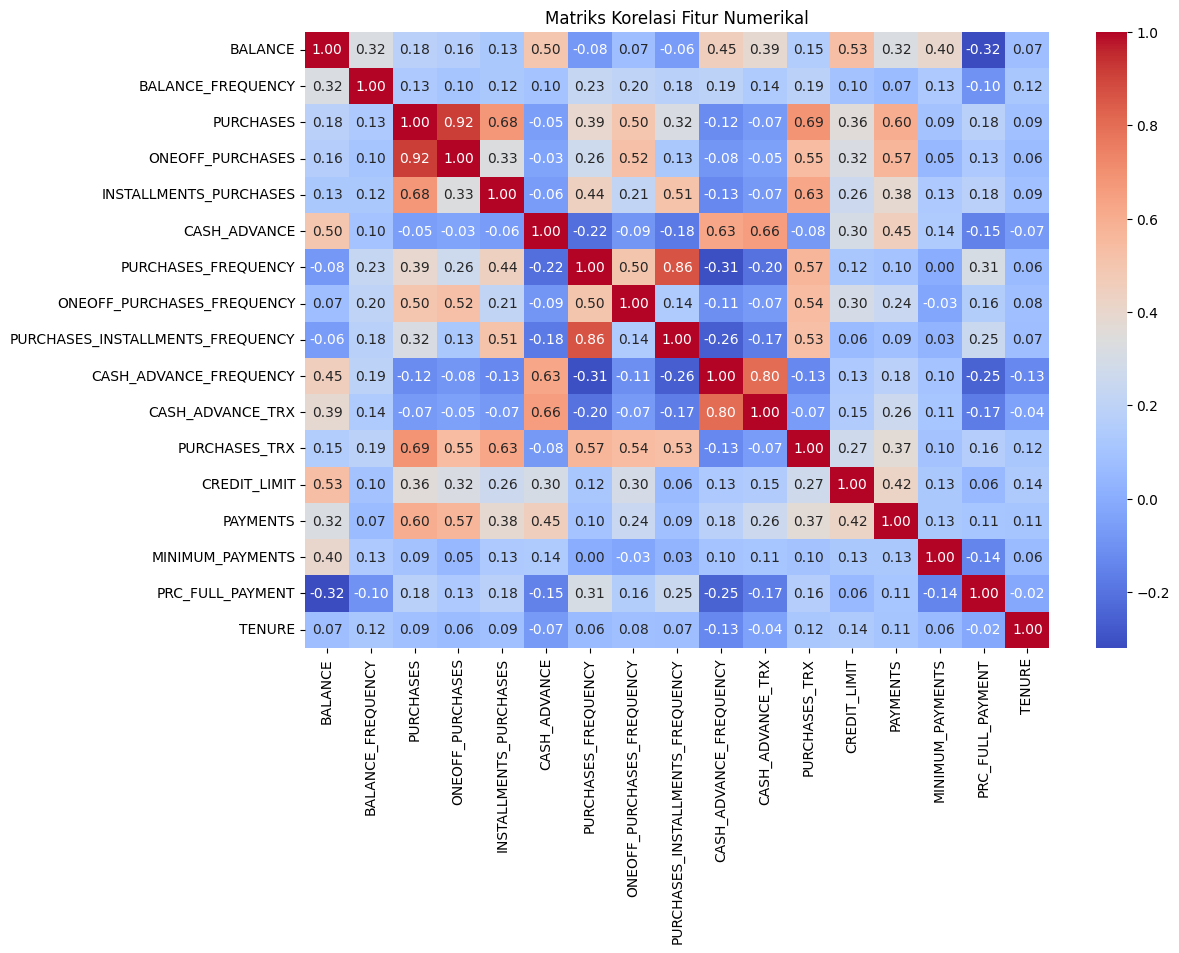

In [3]:
print("\n==== Informasi Dataset ====")
df.info()

print("\n==== Jumlah Missing Values ====")
print(df.isnull().sum())

# Visualisasi untuk BALANCE
plt.figure(figsize=(12, 6))
sns.histplot(df['BALANCE'], bins=30, kde=True)
plt.title("Distribusi BALANCE")
plt.xlabel("BALANCE")
plt.ylabel("Frekuensi")
plt.show()

# Visualisasi boxplot untuk PURCHASES
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['PURCHASES'])
plt.title("Boxplot PURCHASES")
plt.xlabel("PURCHASES")
plt.show()

# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriks Korelasi Fitur Numerikal")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [4]:
df_cleaned = df.drop(columns=['CUST_ID'])

imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df_cleaned), columns=df_cleaned.columns)

df_imputed['BALANCE_CAT'] = pd.qcut(df_imputed['BALANCE'], q=3, labels=['Low', 'Medium', 'High'])

df_imputed['UTILIZATION'] = df_imputed['BALANCE'] / df_imputed['CREDIT_LIMIT']

df_imputed['UTIL_CAT'] = pd.cut(df_imputed['UTILIZATION'], bins=[0, 0.3, 0.7, 1.0, 1.5],
                                labels=['Low', 'Medium', 'High', 'Very High'])

df_imputed['PAYMENT_EFF'] = df_imputed['PAYMENTS'] / (df_imputed['MINIMUM_PAYMENTS'] + 1)

df_imputed['SPENDING_INTENSITY'] = df_imputed['PURCHASES'] / (df_imputed['BALANCE'] + 1)

df_imputed['TOTAL_TRX'] = df_imputed['CASH_ADVANCE_TRX'] + df_imputed['PURCHASES_TRX']

df_imputed['LOG_PURCHASES'] = np.log(df_imputed['PURCHASES'] + 1)
df_imputed['LOG_CASH_ADVANCE'] = np.log(df_imputed['CASH_ADVANCE'] + 1)

print("\n==== Contoh Data Setelah Advanced Feature Engineering ====")
print(df_imputed[['BALANCE', 'BALANCE_CAT', 'UTILIZATION', 'UTIL_CAT', 'PAYMENT_EFF',
                  'SPENDING_INTENSITY', 'TOTAL_TRX', 'LOG_PURCHASES', 'LOG_CASH_ADVANCE']].head())



==== Contoh Data Setelah Advanced Feature Engineering ====
       BALANCE BALANCE_CAT  UTILIZATION UTIL_CAT  PAYMENT_EFF  \
0    40.900749         Low     0.040901      Low     1.436214   
1  3202.467416        High     0.457495   Medium     3.822677   
2  2495.148862        High     0.332687   Medium     0.990103   
3  1666.670542        High     0.222223      Low     0.000000   
4   817.714335      Medium     0.681429   Medium     2.759800   

   SPENDING_INTENSITY  TOTAL_TRX  LOG_PURCHASES  LOG_CASH_ADVANCE  
0            2.276809        2.0       4.568506          0.000000  
1            0.000000        4.0       0.000000          8.770896  
2            0.309745       12.0       6.651791          0.000000  
3            0.898859        2.0       7.313220          5.331694  
4            0.019543        1.0       2.833213          0.000000  


In [5]:
numeric_features = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS",
                    "UTILIZATION", "PAYMENT_EFF", "SPENDING_INTENSITY", "TOTAL_TRX",
                    "LOG_PURCHASES", "LOG_CASH_ADVANCE"]

categorical_features = ["BALANCE_CAT", "UTIL_CAT"]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Terapkan transformasi
X = preprocessor.fit_transform(df_imputed)
print("\nBentuk data setelah preprocessing:", X.shape)



Bentuk data setelah preprocessing: (8950, 17)


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [6]:
# Pencarian jumlah cluster optimal dengan Elbow Method dan Silhouette Score
inertia = []
silhouette_scores = []
K_range = range(2, 6)

print("\n==== Model Clustering untuk Berbagai Nilai k ====")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia_val = kmeans.inertia_
    sil_score = silhouette_score(X, kmeans.labels_)
    inertia.append(inertia_val)
    silhouette_scores.append(sil_score)
    print(f"k = {k} -> Inertia: {round(inertia_val, 2)}, Silhouette Score: {round(sil_score, 3)}")



==== Model Clustering untuk Berbagai Nilai k ====
k = 2 -> Inertia: 87835.31, Silhouette Score: 0.262
k = 3 -> Inertia: 75750.19, Silhouette Score: 0.261
k = 4 -> Inertia: 68027.3, Silhouette Score: 0.264
k = 5 -> Inertia: 62244.86, Silhouette Score: 0.267


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

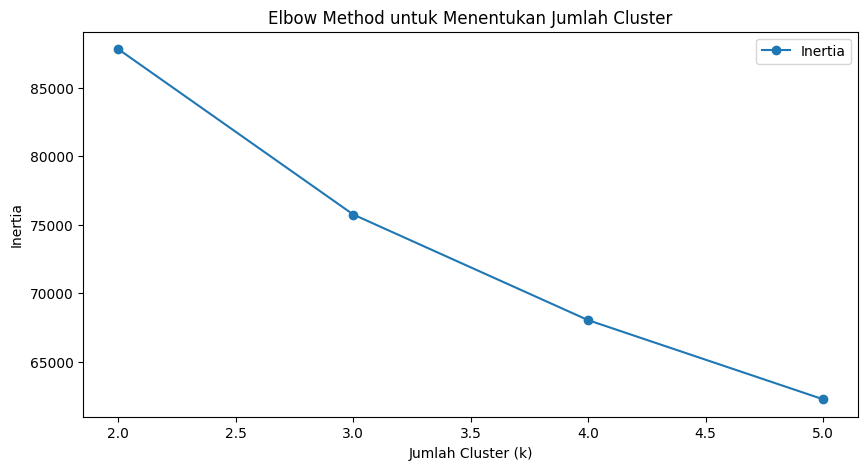

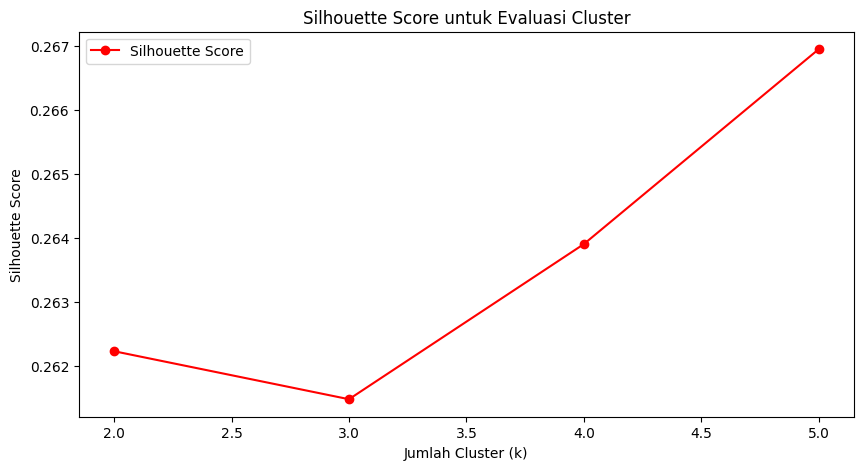


Jumlah cluster optimal: 5
Silhouette Score model akhir: 0.267


In [7]:
# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-', label='Inertia')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.legend()
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='red', label='Silhouette Score')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Evaluasi Cluster')
plt.legend()
plt.show()

optimal_k = 5
print(f"\nJumlah cluster optimal: {optimal_k}")

# Membangun model KMeans
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X)
df_imputed['Cluster'] = cluster_labels  # Tambahkan label ke dataset

# Evaluasi
final_silhouette = silhouette_score(X, cluster_labels)
print(f"Silhouette Score model akhir: {round(final_silhouette, 3)}")


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [8]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

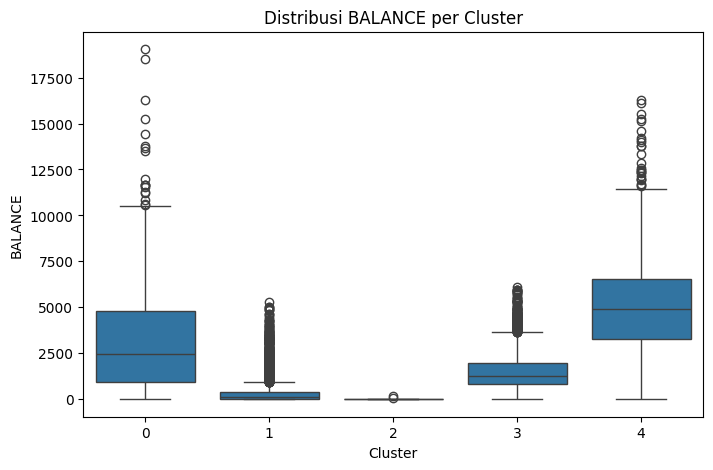

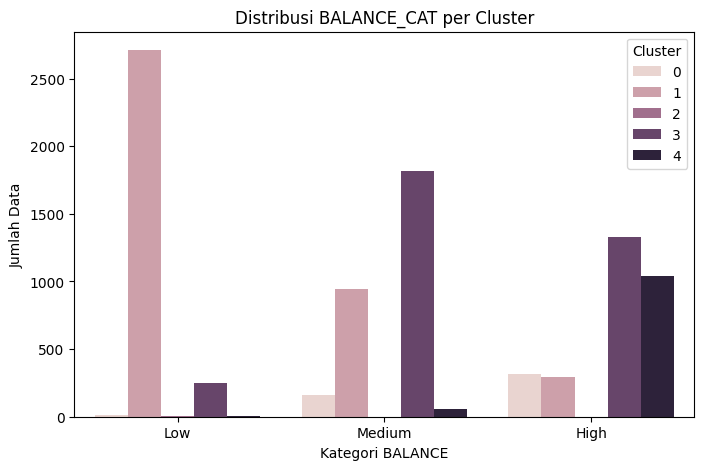

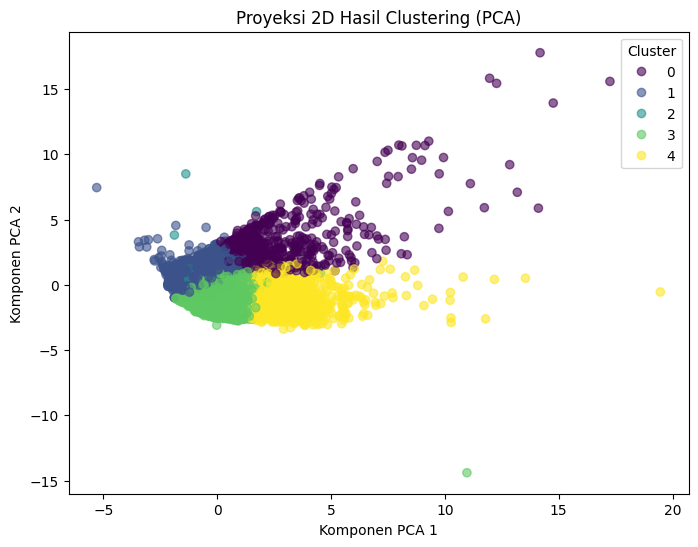

In [9]:
# Visualisasi distribusi BALANCE per Cluster (boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster', y='BALANCE', data=df_imputed)
plt.title("Distribusi BALANCE per Cluster")
plt.xlabel("Cluster")
plt.ylabel("BALANCE")
plt.show()

# Visualisasi distribusi fitur kategorikal BALANCE_CAT per Cluster (countplot)
plt.figure(figsize=(8, 5))
sns.countplot(x='BALANCE_CAT', hue='Cluster', data=df_imputed)
plt.title("Distribusi BALANCE_CAT per Cluster")
plt.xlabel("Kategori BALANCE")
plt.ylabel("Jumlah Data")
plt.show()

# Proyeksi sebaran cluster
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.title("Proyeksi 2D Hasil Clustering (PCA)")
plt.xlabel("Komponen PCA 1")
plt.ylabel("Komponen PCA 2")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [10]:
agg_numeric = df_imputed.groupby('Cluster')[numeric_features].agg(['min', 'max', 'mean'])
print("\n==== Agregasi Statistik Fitur Numerikal per Cluster ====")
print(agg_numeric)

def mode_func(x):
    return x.mode()[0]

agg_categorical = df_imputed.groupby('Cluster')[categorical_features].agg(mode_func)
print("\n==== Agregasi Statistik Fitur Kategorikal per Cluster ====")
print(agg_categorical)

print("\n==== Interpretasi Hasil Cluster (Advanced) ====")
for cl in sorted(df_imputed['Cluster'].unique()):
    cluster_data = df_imputed[df_imputed['Cluster'] == cl]
    count_data = cluster_data.shape[0]

    balance_mean = cluster_data['BALANCE'].mean()
    balance_min = cluster_data['BALANCE'].min()
    balance_max = cluster_data['BALANCE'].max()
    dominant_balance_cat = cluster_data['BALANCE_CAT'].mode()[0]

    purchases_mean = cluster_data['PURCHASES'].mean()
    util_mean = cluster_data['UTILIZATION'].mean()
    pay_eff_mean = cluster_data['PAYMENT_EFF'].mean()
    spend_intensity_mean = cluster_data['SPENDING_INTENSITY'].mean()
    total_trx_mean = cluster_data['TOTAL_TRX'].mean()

    print(f"\nCluster {cl} (Jumlah Data: {count_data}):")
    print(f"  • BALANCE: Rata-rata = {round(balance_mean,2)}, Min = {round(balance_min,2)}, Max = {round(balance_max,2)}")
    print(f"    -> Kategori BALANCE dominan: {dominant_balance_cat}")
    print(f"  • PURCHASES (rata-rata): {round(purchases_mean,2)}")
    print(f"  • UTILIZATION (rata-rata): {round(util_mean,2)}")
    print(f"  • PAYMENT_EFFICIENCY (rata-rata): {round(pay_eff_mean,2)}")
    print(f"  • SPENDING INTENSITY (rata-rata): {round(spend_intensity_mean,2)}")
    print(f"  • TOTAL TRANSACTIONS (rata-rata): {round(total_trx_mean,2)}")

    # Penarikan Insight
    if cl == 0:
        # Dari boxplot BALANCE: Cluster 0 tampak memiliki sebaran BALANCE yang luas,
        # banyak outlier di sisi atas. Juga, chart BALANCE_CAT menunjukkan cluster 0
        # banyak 'Low' tetapi memiliki beberapa outlier yang tinggi.
        print("  -> Insight: Cluster 0 tampaknya memiliki mayoritas nasabah dengan BALANCE rendah,")
        print("     namun ada segmen kecil dengan BALANCE sangat tinggi (outliers).")
        print("     UTILIZATION cenderung bervariasi; perlu dicek apakah mayoritas nasabah memanfaatkan kredit rendah.")
    elif cl == 1:
        # Cluster 1 memiliki boxplot BALANCE yang sangat rendah,
        # menandakan nasabah dengan saldo kartu kredit kecil.
        # Mungkin intensitas pembelian juga relatif kecil.
        print("  -> Insight: Cluster 1 adalah kelompok dengan BALANCE sangat rendah,")
        print("     tampaknya berisi nasabah yang jarang bertransaksi atau memiliki limit kecil.")
        print("     Bisa jadi nasabah pemula atau yang jarang memakai kartu.")
    elif cl == 2:
        # Cluster 2 cenderung memiliki boxplot BALANCE hampir mendekati 0,
        # menandakan nasabah dengan saldo nyaris nol.
        # Berbeda dengan cluster 1, perhatikan SPENDING_INTENSITY atau transaksi.
        print("  -> Insight: Cluster 2 memiliki BALANCE hampir nol, menandakan nasabah yang mungkin langsung melunasi tagihan.")
        print("     Meskipun limit bisa bervariasi, saldo akhir mereka kecil. Lihat intensitas pembelian dan payment efficiency.")
    elif cl == 3:
        # Cluster 3 tampak memiliki BALANCE boxplot di kisaran menengah,
        # outlier pun tidak terlalu banyak.
        # Mungkin mewakili nasabah dengan penggunaan kartu stabil.
        print("  -> Insight: Cluster 3 menampilkan nasabah dengan BALANCE menengah,")
        print("     intensitas pembelian moderat, serta cenderung memiliki efisiensi pembayaran yang baik.")
        print("     Berpotensi menjadi segmen 'ideal' dengan manajemen kredit cukup sehat.")
    elif cl == 4:
        # Cluster 4 boxplot menunjukkan median BALANCE lebih tinggi ketimbang 1,2,3,
        # tapi tak sebanyak cluster 0. Juga banyak 'High' di BALANCE_CAT.
        print("  -> Insight: Cluster 4 berisi nasabah dengan BALANCE relatif tinggi,")
        print("     namun tidak setinggi outlier di cluster 0. Mungkin mewakili nasabah aktif berbelanja,")
        print("     tetapi masih dalam rentang lebih stabil daripada cluster 0.")

    # Treshold-based interpretasi lanjutan
    if util_mean < 0.3:
        print("     - Rata-rata pemanfaatan kredit (UTILIZATION) rendah.")
    elif util_mean < 0.7:
        print("     - Rata-rata pemanfaatan kredit (UTILIZATION) sedang.")
    else:
        print("     - Rata-rata pemanfaatan kredit (UTILIZATION) tinggi (waspadai risiko kredit).")

    if spend_intensity_mean < 0.1:
        print("     - Intensitas pembelian (SPENDING_INTENSITY) rendah.")
    elif spend_intensity_mean < 0.5:
        print("     - Intensitas pembelian (SPENDING_INTENSITY) sedang.")
    else:
        print("     - Intensitas pembelian (SPENDING_INTENSITY) tinggi.")




==== Agregasi Statistik Fitur Numerikal per Cluster ====
           BALANCE                            PURCHASES            \
               min           max         mean       min       max   
Cluster                                                             
0         4.382924  19043.138560  3357.729631      21.0  49039.57   
1         0.000000   5315.945594   398.094127       0.0   6520.00   
2         0.422555    198.035504    36.521894       0.0   1985.62   
3         0.000000   6090.522273  1513.097272       0.0   4063.49   
4        27.585915  16304.889250  5114.994285       0.0   5197.22   

                     CASH_ADVANCE                            CREDIT_LIMIT  \
                mean          min           max         mean          min   
Cluster                                                                     
0        6923.711959          0.0  19513.474830   745.738411       1000.0   
1         944.684471          0.0   2716.839070    45.393934        200.0   
2   

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [11]:
scaler = preprocessor.named_transformers_['num']
X_numeric_scaled = scaler.transform(df_imputed[numeric_features])
X_numeric_original = scaler.inverse_transform(X_numeric_scaled)

print(pd.DataFrame(X_numeric_original, columns=numeric_features).head(5))


       BALANCE  PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
0    40.900749      95.40      0.000000        1000.0   201.802084   
1  3202.467416       0.00   6442.945483        7000.0  4103.032597   
2  2495.148862     773.17      0.000000        7500.0   622.066742   
3  1666.670542    1499.00    205.788017        7500.0     0.000000   
4   817.714335      16.00      0.000000        1200.0   678.334763   

   UTILIZATION  PAYMENT_EFF  SPENDING_INTENSITY  TOTAL_TRX  LOG_PURCHASES  \
0     0.040901     1.436214        2.276809e+00        2.0       4.568506   
1     0.457495     3.822677       -8.881784e-16        4.0       0.000000   
2     0.332687     0.990103        3.097451e-01       12.0       6.651791   
3     0.222223     0.000000        8.988586e-01        2.0       7.313220   
4     0.681429     2.759800        1.954284e-02        1.0       2.833213   

   LOG_CASH_ADVANCE  
0          0.000000  
1          8.770896  
2          0.000000  
3          5.331694  
4     

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

# Interpretasi Hasil Cluster

Berikut adalah interpretasi mendalam berdasarkan analisis cluster pada dataset:

---

## Cluster 0 (Jumlah Data: 490)
- **BALANCE:**  
  - Rata-rata = 3357.73  
  - Min = 4.38  
  - Max = 19043.14  
  - **Kategori BALANCE dominan:** High  
- **PURCHASES (rata-rata):** 6923.71  
- **UTILIZATION (rata-rata):** 0.38  
- **PAYMENT_EFFICIENCY (rata-rata):** 13.13  
- **SPENDING INTENSITY (rata-rata):** 4.81  
- **TOTAL TRANSACTIONS (rata-rata):** 88.38  
- **Insight:**  
  Cluster 0 tampaknya memiliki mayoritas nasabah dengan BALANCE tinggi, tetapi terdapat segmen kecil dengan BALANCE sangat tinggi (potensial outlier). Meskipun UTILIZATION menunjukkan nilai yang sedang, perlu dicek apakah mayoritas nasabah memanfaatkan kredit secara moderat. Intensitas pembelian yang tinggi mengindikasikan bahwa nasabah dalam cluster ini melakukan transaksi dalam jumlah besar, meskipun mungkin terdapat variasi besar karena adanya outlier.

---

## Cluster 1 (Jumlah Data: 3954)
- **BALANCE:**  
  - Rata-rata = 398.09  
  - Min = 0.0  
  - Max = 5315.95  
  - **Kategori BALANCE dominan:** Low  
- **PURCHASES (rata-rata):** 944.68  
- **UTILIZATION (rata-rata):** 0.1  
- **PAYMENT_EFFICIENCY (rata-rata):** 7.22  
- **SPENDING INTENSITY (rata-rata):** 15.8  
- **TOTAL TRANSACTIONS (rata-rata):** 14.81  
- **Insight:**  
  Cluster 1 merupakan kelompok nasabah dengan BALANCE sangat rendah, yang mengindikasikan bahwa mereka mungkin jarang melakukan transaksi atau memiliki limit kecil. Ini bisa menandakan nasabah pemula atau yang jarang menggunakan kartu. Meskipun BALANCE rendah, intensitas pembelian yang tinggi menunjukkan bahwa saat mereka melakukan transaksi, nilai pembeliannya relatif tinggi.

---

## Cluster 2 (Jumlah Data: 8)
- **BALANCE:**  
  - Rata-rata = 36.52  
  - Min = 0.42  
  - Max = 198.04  
  - **Kategori BALANCE dominan:** Low  
- **PURCHASES (rata-rata):** 346.44  
- **UTILIZATION (rata-rata):** 0.0  
- **PAYMENT_EFFICIENCY (rata-rata):** 863.02  
- **SPENDING INTENSITY (rata-rata):** 136.18  
- **TOTAL TRANSACTIONS (rata-rata):** 8.75  
- **Insight:**  
  Cluster 2 terdiri dari nasabah dengan BALANCE hampir nol, yang menandakan bahwa mereka mungkin segera melunasi tagihan sehingga saldo tetap rendah. Walaupun limit kredit bisa bervariasi, saldo akhir mereka cenderung kecil. Tingginya nilai PAYMENT_EFFICIENCY dan SPENDING INTENSITY menunjukkan bahwa meskipun transaksi tidak sering, ketika terjadi transaksi, nilainya sangat tinggi.

---

## Cluster 3 (Jumlah Data: 3394)
- **BALANCE:**  
  - Rata-rata = 1513.1  
  - Min = 0.0  
  - Max = 6090.52  
  - **Kategori BALANCE dominan:** Medium  
- **PURCHASES (rata-rata):** 327.69  
- **UTILIZATION (rata-rata):** 0.66  
- **PAYMENT_EFFICIENCY (rata-rata):** 3.08  
- **SPENDING INTENSITY (rata-rata):** 0.27  
- **TOTAL TRANSACTIONS (rata-rata):** 10.36  
- **Insight:**  
  Cluster 3 menampilkan nasabah dengan BALANCE menengah dan intensitas pembelian yang moderat. Nilai PAYMENT_EFFICIENCY yang tinggi menunjukkan bahwa nasabah dalam cluster ini cenderung membayar tepat waktu. Secara keseluruhan, segmen ini dapat dikategorikan sebagai 'ideal', di mana pengelolaan kredit dan pengeluaran berada pada tingkat yang seimbang.

---

## Cluster 4 (Jumlah Data: 1104)
- **BALANCE:**  
  - Rata-rata = 5114.99  
  - Min = 27.59  
  - Max = 16304.89  
  - **Kategori BALANCE dominan:** High  
- **PURCHASES (rata-rata):** 666.52  
- **UTILIZATION (rata-rata):** 0.61  
- **PAYMENT_EFFICIENCY (rata-rata):** 4.22  
- **SPENDING INTENSITY (rata-rata):** 0.18  
- **TOTAL TRANSACTIONS (rata-rata):** 21.41  
- **Insight:**  
  Cluster 4 terdiri dari nasabah dengan BALANCE yang relatif tinggi namun tidak setinggi outlier di Cluster 0. Ini mengindikasikan segmen nasabah yang aktif berbelanja dengan stabilitas yang baik. Meskipun BALANCE tinggi, penggunaan kredit (UTILIZATION) dan intensitas pembelian menunjukkan bahwa nasabah ini mengelola pengeluaran mereka dengan cukup hati-hati, tanpa adanya lonjakan besar yang tidak biasa.

---

# Kesimpulan Interpretasi Cluster

- **Cluster 0:**  
  Nasabah dengan BALANCE tinggi dan transaksi pembelian besar, meskipun terdapat outlier dengan saldo sangat tinggi.  
- **Cluster 1:**  
  Nasabah dengan BALANCE sangat rendah yang mungkin merupakan nasabah pemula atau yang jarang menggunakan kartu, tetapi dengan intensitas pembelian yang tinggi saat bertransaksi.  
- **Cluster 2:**  
  Nasabah dengan saldo hampir nol yang segera melunasi tagihan, menunjukkan efisiensi pembayaran yang luar biasa meskipun frekuensi transaksi rendah.  
- **Cluster 3:**  
  Nasabah dengan BALANCE menengah yang menunjukkan keseimbangan baik antara pengeluaran dan pembayaran, mengindikasikan pengelolaan kredit yang sehat.  
- **Cluster 4:**  
  Nasabah dengan BALANCE tinggi yang aktif bertransaksi namun dalam rentang yang lebih stabil dibandingkan dengan outlier di Cluster 0.

Interpretasi ini memberikan wawasan mendalam untuk pengelompokkan nasabah berdasarkan karakteristik finansial mereka dan dapat digunakan sebagai dasar untuk strategi pemasaran atau pengelolaan risiko keuangan.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [13]:
# Simpan dataset hasil clustering
df_imputed.to_csv("Dataset_inisiasi3.csv", index=False)
print("\nDataset hasil clustering telah disimpan sebagai 'Dataset_inisiasi.csv'.")



Dataset hasil clustering telah disimpan sebagai 'Dataset_inisiasi.csv'.
